In [68]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [69]:
path='E:\Worksapce\PyCharm\pythonProject\data\\'

In [70]:
# Lưu địa chỉ các file cần đọc
filepaths = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        filepaths.append(filepath)

In [71]:
# Gộp tất cả các dataframe lại với nhau bằng pd.concat(list các dataframes)
frames = []
for file in filepaths:
    df = pd.read_csv(file)  # Đọc file csv (comma seperated values)
    frames.append(df)
res = pd.concat(frames)
df = res
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [72]:
df = df.to_csv('annualSales.csv', index=False)  #Lưu df lớn vào file annualSales, loại bỏ index
df = pd.read_csv('annualSales.csv')

In [73]:
df['Month'] = df['Order Date'].str[0:2] #Thêm cột month = cách substring cột order date (2 kí tự đầu)
df=df.dropna()  # Xóa dòng NaN

In [74]:
df=df[df['Month']!='Or']  #Lấy các dòng có month != 'Or'
df
df['Month']=df['Month'].astype(int)  #Chuyển data type từ string sang int

In [75]:
print(set(df['Month']))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


In [76]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [77]:
df['Quantity Ordered']=df['Quantity Ordered'].astype(int) #Thay đổi data type sang int

In [78]:
df['Price Each']=df['Price Each'].astype(float) #Thay đổi data type sang float

In [79]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [80]:
df['Sales']=df['Price Each']*df['Quantity Ordered']  #Thêm cột Tottal=Price Each * Quantity Order

In [81]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [82]:
#Tính tổng tiền thu được theo tháng, tạo data frame df1, cột 1 là month, cột 2 là sales by months
df1=df.groupby('Month')['Sales'].sum().reset_index(name='Sales by months')

In [83]:
df1.head(50)

,Month,Sales by months
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


In [84]:
df1[df1['Sales by months']==df1['Sales by months'].max()] #Lấy ra tháng có doanh số cao nhất

,Month,Sales by months
11,12,4613443.34


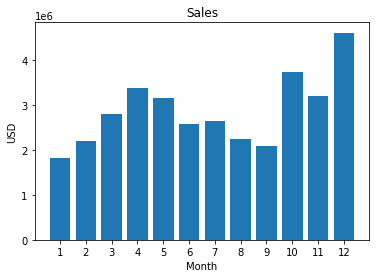

In [85]:
months=[ i for i in range (1,13)]
plt.bar(months,df1['Sales by months'])
plt.xticks(months) #Nếu không có dòng này thì trục hoành chỉ có tháng chẵn
plt.ylabel('USD') #Đặt tên trục tung
plt.xlabel('Month') #Đặt tên trục hoành
plt.title('Sales') #Đặt tên biểu đồ
plt.show()

In [86]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [87]:
#Tạo cột city, slice chuỗi, lấy vị trí thứ 2 trong list (tên thành phố)
df['City']=df['Purchase Address'].str.split(',').str[1]

In [88]:
#Tính tổng tiền thu được theo thành phố, tạo data frame df2 gồm 2 cột, cột 1 là city, cột 2 là sales by cities
df2=df.groupby('City')['Sales'].sum().reset_index(name='Sales by cities')

In [89]:
df2.dtypes

City                object
Sales by cities    float64
dtype: object

In [90]:
df2[df2['Sales by cities']==df2['Sales by cities'].max()] #Lấy ra thành phố có doanh số cao nhất

,City,Sales by cities
7,San Francisco,8262203.91


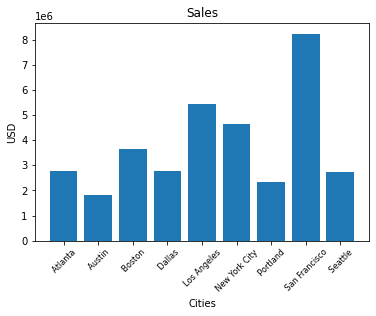

In [91]:
months=[ i for i in range (1,13)]
plt.bar(df2['City'],df2['Sales by cities'])
#plt.xticks(df2['City'])
plt.ylabel('USD')
plt.xlabel('Cities')
plt.title('Sales')
plt.xticks(rotation=45,size=8) #Rotate, resize tên thành phố ở trục hoành
plt.show()

In [92]:
 #Rotate, resize tên thành phố ở trục hoành
#df2.plot(kind='bar',x='City',figsize=(20,8))
#plt.xticks(rotation=0,size=10)

In [93]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [94]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales               float64
City                 object
dtype: object

In [95]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [96]:
df['Hours']=df['Order Date'].dt.hour

In [97]:
df3 = df.groupby('Hours')['Quantity Ordered'].sum().reset_index(name='Amount')
#Nếu không có .reset_index thì df3 và df4 lại là series
df3.dtypes

Hours     int64
Amount    int32
dtype: object

In [98]:
df4=df.groupby('Hours')['Sales'].sum().reset_index(name="Sales")
df4.dtypes

Hours      int64
Sales    float64
dtype: object

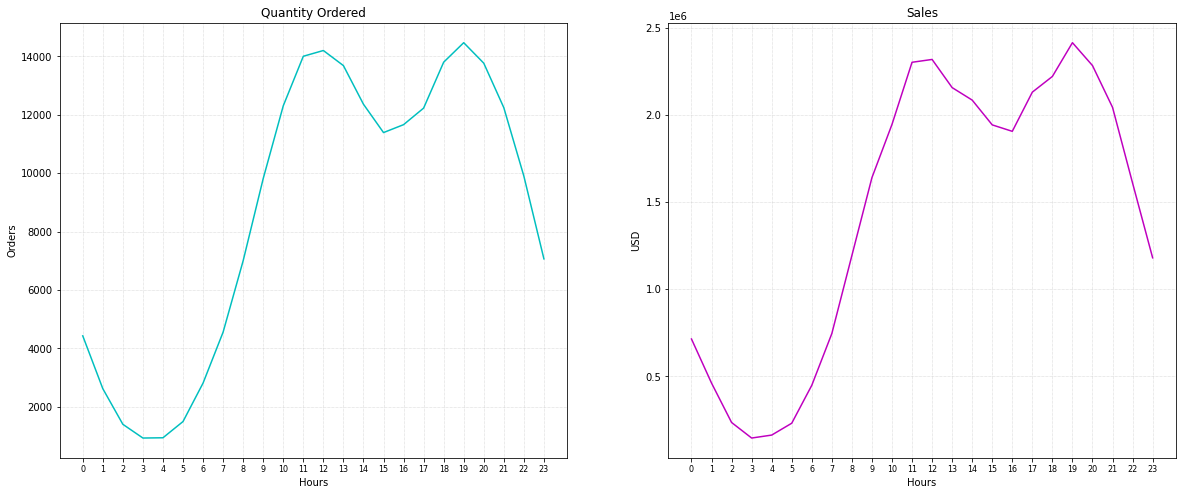

In [99]:
Hours=[h for h in range(0,24)]
plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(Hours,df3['Amount'], c='c')
plt.grid(ls=':', lw=0.5) #Thêm lưới, ls: line style, lw: line width
plt.xticks(df3['Hours'])
plt.xticks(size=8)
plt.xlabel("Hours")
plt.ylabel("Orders")
plt.title('Quantity Ordered')


plt.subplot(1, 2, 2)
plt.plot(Hours,df4['Sales'], c='m')
plt.grid(ls=':', lw=0.5)
plt.xticks(df4['Hours'])
plt.xticks(size=8)
plt.xlabel("Hours")
plt.ylabel("USD")
plt.title('Sales')
plt.show() #Vẽ 2 line graph bên cạnh nhau

In [100]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,11
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


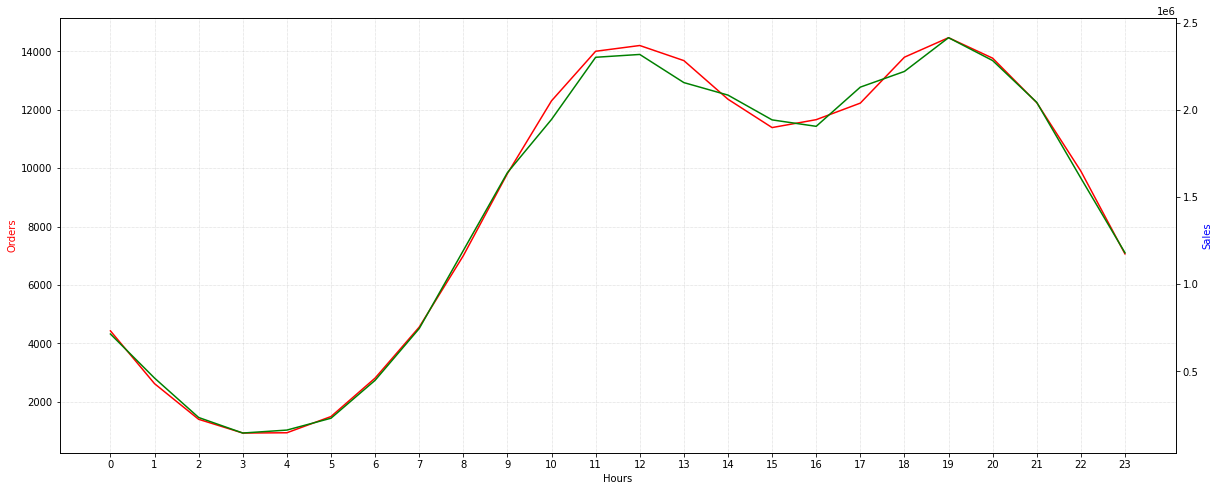

In [101]:
orders_in_hours = df.groupby('Hours')['Quantity Ordered'].sum()  #Lọc số lần chốt đơn theo khung giờ
sales_in_hours = df.groupby('Hours')['Sales'].sum()  #Lọc doanh thu theo khung giờ
#Tạo list các giờ Hours, lặp qua series sales_in_hours, lấy hour và đẩy vảo Hours
Hours = [hour for hour, sales in orders_in_hours.items()]
x = Hours
y1 = orders_in_hours
y2 = sales_in_hours

fig, ax1 = plt.subplots(figsize=(20,8))
ax2 = ax1.twinx()
ax1.plot(x, y1, color='r')
ax2.plot(x, y2, c='g')
plt.xticks(Hours)
ax1.set_xlabel('Hours')
ax1.set_ylabel('Orders', color='r')
#ax1.set_xticklabels(product_ls, rotation=90)
ax2.set_ylabel('Sales', color='b')
ax1.grid(ls=':', lw=0.5) #Thêm lưới
plt.show() #Vẽ đè 2 line

In [102]:
df_dup=df[df['Order ID'].duplicated(keep=False)] #Ở đây keep có thể bằng first, last hoặc flase
#Nếu keep= first thì giữ lại ví trí đầu tiên lặp, keep= last thì giữ lại vị trí cuối cùng lặp, keep= false thì giữ
#lại hết
df_dup

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,16
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,11
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,0
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13


In [103]:
group_product = lambda product: ', '.join(product)
#lambda arguments : expression
#  x = lambda a : a + 10
#  print(x(5))
# output : 15
df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(group_product)
# Gộp các hàng có cùng order id bằng transform (gộp product)
# Tham số của transform phải là một function, transform trả về series
df_dup

C:\Users\84387\AppData\Local\Temp\ipykernel_3500\387493975.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(group_product)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,All Product
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,16,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin,16,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,11,"Vareebadd Phone, Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0,"Wired Headphones, AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,0,"Wired Headphones, AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13,"Google Phone, USB-C Charging Cable"


In [104]:
df_dup[['Order ID', 'All Product']].drop_duplicates()['All Product'].value_counts()
#Xóa các order ID trùng nhau (giữ lại 1 chứ không xóa hết) , đếm số lượng của 'all product' trùng nhau

iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
                                                       ... 
Vareebadd Phone, Wired Headphones, iPhone                 1
Google Phone, Wired Headphones, USB-C Charging Cable      1
LG Washing Machine, Wired Headphones                      1
LG Washing Machine, Google Phone                          1
LG Washing Machine, AA Batteries (4-pack)                 1
Name: All Product, Length: 366, dtype: int64

C:\Users\84387\AppData\Local\Temp\ipykernel_3500\2846080180.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_ls, rotation=90)


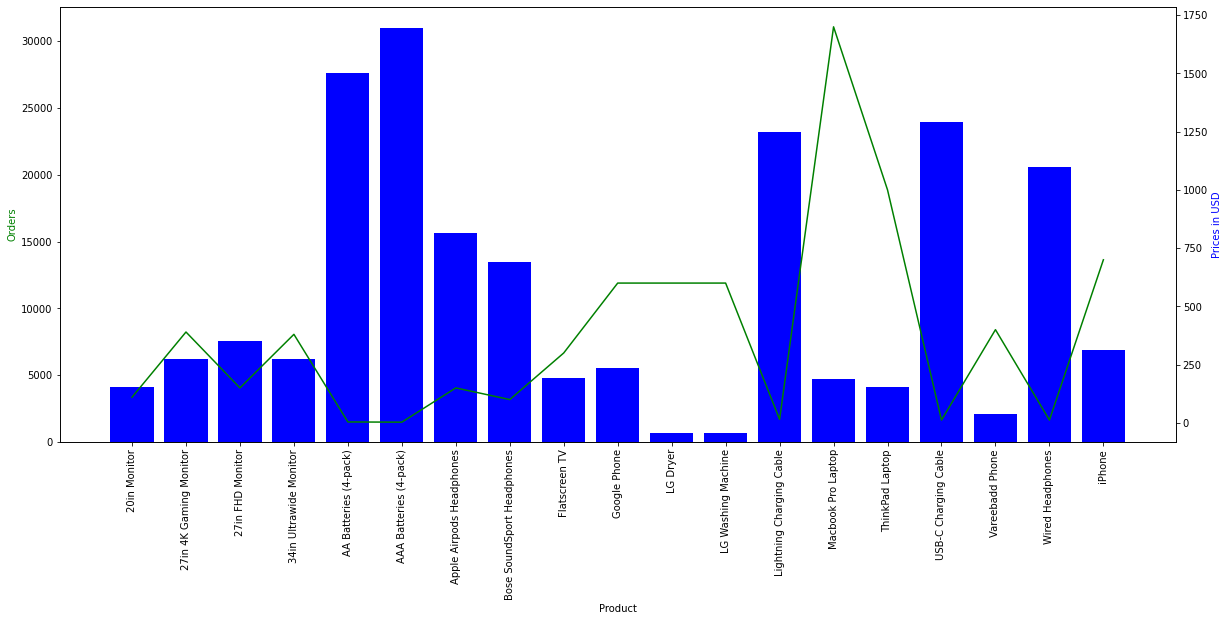

In [105]:
orders_per_product = df.groupby('Product')['Quantity Ordered'].sum()
prices_per_product = df.groupby('Product')['Price Each'].mean()
product_ls = [product for product, order in orders_per_product.items()]
x = product_ls
y1 = orders_per_product
y2 = prices_per_product
fig, ax1 = plt.subplots(figsize=(20,8))
ax2 = ax1.twinx()
ax1.bar(x, y1, color='b')
ax2.plot(x, y2, c='g')
ax1.set_xlabel('Product')
ax1.set_ylabel('Orders', color='g')
ax1.set_xticklabels(product_ls, rotation=90)
ax2.set_ylabel('Prices in USD', color='b')
plt.show()